# REPORT 7
$ CLAUDIA -  CABREL $

$ 20183351 $

## PARTE 1 - ENSAYO
### The Effects of Exposure to Better Neighborhoods on Children: New Evidence from the Moving to Opportunity Experiment - Raj Chetty, Nathaniel Hendren y Lawrence Katz 

    La pregunta de investigación presentada por el autor es si es que existe algún efecto positivo en el hecho de que jóvenes o niños puedan mudarse a “mejores barrios” y si esto afecta en su futuro económico. Para ello hace uso de toda la data administrativa de los salarios en Estados Unidos.
    El estudio presenta un conjunto de fortalezas, entre ellas: el hecho de que los autores hicieron uso de una argumentación estadística para fundamentar la hipótesis y los resultados deseados. Por ejemplo, se hizo uso de correlaciones para poder contrastar los modelos estadísticos anteriormente presentados en su estudio, así como también se realizaron regresiones lineales como parte del proceso. En suma, durante el estudio resaltaron que se debía hacer uso de otras variables aparte de las mencionadas, esto se considera una fortaleza debido a que no se conforman solo con lo que se presentó en un inicio como variables dependientes, sino que observan que otras variables pueden tener efectos causales y los resultados podrían variar respecto a esto. Sin embargo, también se presentan algunas debilidades dentro de lo demostrado por los autores, y es que, por ejemplo, algunas de las pruebas realizadas como la de permutación y F paramétricas comprobaron que es “poco probable que los efectos significativos del tratamiento que se detectó sea un artefacto de hacer comparaciones múltiples”. De igual forma, no se tomó en consideración factores como estructura familiar, donde una familia disfuncional habría generado un gran declive en el desempeño económico y financiero que uno de los niños presentes en el experimento podría haber tenido.
    El aporte generado a través del análisis de los autores es que ahondó de manera correcta y detallada en el tema, sacando conclusiones precisas y claras que brindaron una respuesta a la pregunta de investigación, asimismo, al haber explicado cada parte del proceso, mientras se hacían análisis estadísticos, pruebas de investigación y modelos de correlación; esto con el fin de poder brindarle al lector una interpretación esencial del contenido.
    El siguiente paso a ejecutar podría ser evaluar los ingresos de los padres, así como también agregar un seguimiento especialmente hacia ellos para ver si estos se encuentran en la capacidad de brindar una mejor educación a sus hijos, no solo económicamente, sino invertir estos váuchers directamente en el futuro de sus hijos y no a beneficio propio.
    

## PARTE 2 - CÓDIGO 
## Claudia Cabrel & Aisha Martinez
### Ploteo de Histogramas

In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
from sklearn.linear_model import LinearRegression

DATA

In [91]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [92]:
data1 = (data.assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" 
 ))) 
data1

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [86]:
data2 = (data1
 .assign(etnicity = np.select(
     [data1["asian"].astype(bool), data1["black"].astype(bool),data1["hawaiian"].astype(bool),data1["hispanic"].astype(bool),data1["unknown"].astype(bool),data1["white"].astype(bool)],
     ["asian", "black","hawaiian","hispanic","unknown","white"],
     default="Not_answered" 
 ))) 
data2.gender=data2.gender.replace({1:"Male", 0: "Female"})
data3=data2.drop(columns=['asian', 'black','hawaiian','unknown','white','format_blended','hispanic','format_ol','format_blended'])
data3 = data3[['gender','etnicity','class_format','falsexam']]
data3

,gender,etnicity,class_format,falsexam
0,Female,white,face_to_face,63.29997
1,Male,white,face_to_face,79.96000
2,Male,white,blended,83.37000
3,Male,white,blended,90.01994
4,Male,white,online,83.30000
...,...,...,...,...
318,Female,white,blended,68.36000
319,Male,asian,online,70.05000
320,Female,asian,online,66.69000
321,Male,asian,online,83.29997


### Expliquen qué diferencias encuentran entre los tres histogramas

En cuanto a las modalidades escogidas, la más escogida fue "face to face", en ese sentido, tiene el promedio más alto. Por otro lado, el menos escogido fue "online" con un promedio de 94.99, siendo el más bajo a comparación de las otras modalidades. En ese sentido, en el formato de "virtual lessons" hay valores más bajos de false exam. Asimismo, el formato mixto tiene una tendencia equilibrada.

falsexam                                                       \
                count       mean        std       min       25%        50%   
class_format                                                                 
blended         109.0  77.093731  10.085906  48.33998  70.08000  78.310000   
face_to_face    120.0  78.547485   9.556128  54.94998  71.21500  79.989985   
online           94.0  73.635263  14.903313   0.00000  66.66675  76.640000   

                                
                    75%    max  
class_format                    
blended       84.970000  96.68  
face_to_face  86.640000  96.68  
online        83.299993  94.99

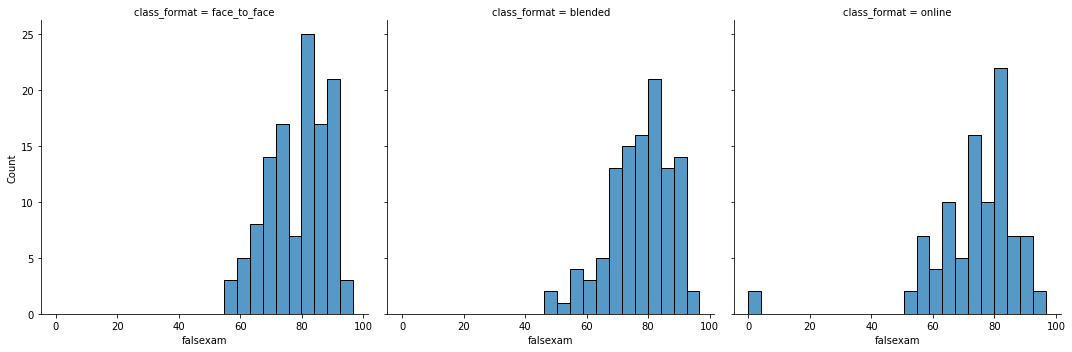

In [87]:
sns.displot(data3, x="falsexam",col="class_format")

data3.groupby(["class_format"]).describe()

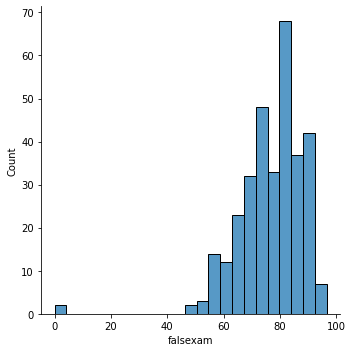

In [88]:
sns.displot(data, x="falsexam")

In [93]:
data = data.assign(valor_ol = data.format_ol*1, valor_blended = data.format_blended*2, valor_ftf = data.format_ftf*3)
data = data.assign(format_type = data.valor_ol + data.valor_blended + data.valor_ftf)
data


AttributeError: 'DataFrame' object has no attribute 'format_ftf'

In [94]:
sns.displot(data, x="falsexam", hue="format_type")
labels= ["Face to Face","Blended Format", "Online Lessons"]
plt.xlabel("Falsexam", fontsize=11)
plt.ylabel("Students", fontsize=11)
plt.title("Histograma", fontsize=12)
plt.legend(labels)


ValueError: Could not interpret value `format_type` for parameter `hue`

### Difference-in-means estimator

In [74]:
data4 = data3[data3["class_format"].str.contains("blended") == False]
data4

,gender,etnicity,class_format,falsexam
0,Female,white,face_to_face,63.29997
1,Male,white,face_to_face,79.96000
4,Male,white,online,83.30000
5,Female,asian,online,88.34996
7,Male,asian,face_to_face,90.00000
...,...,...,...,...
316,Female,white,face_to_face,91.65000
317,Male,asian,face_to_face,84.99000
319,Male,asian,online,70.05000
320,Female,asian,online,66.69000


In [75]:
separar=[1.0, 3.0]
PRUEBA2 = DIM[DIM['format_type'].isin(separar)]

PRUEBA2

,format_type,falsexam
4,1.0,83.30000
5,1.0,88.34996
9,1.0,73.37000
10,1.0,83.30000
16,1.0,80.05000
...,...,...
306,1.0,70.00000
309,1.0,0.00000
319,1.0,70.05000
320,1.0,66.69000


In [76]:
PRUEBA2.groupby(["format_type"]).mean()

,falsexam
format_type,
1.0,73.635263


In [77]:
Diferencia_medias=  78.547485-73.635263
Diferencia_medias

4.912222

    Los valores en False Exam en el grupo de Face to Face son mayores que "Online Lesson". En ese sentido, más escogido sería el formato Face to Face.

### Difference-in-means estimator via linear regression

    Las clases "face to face" obtuvieron un puntaje de 78.547485, mien tras que las "online lesson" uno de 73.635263. Dando a entender que se prefiere a las clases presenciales por sobre las virtuales además que el rendimientos de los alumnos no es igual.

In [78]:
PRUEBA3 = DIM
print(PRUEBA3.format_type)
for i in range (323):
    if (PRUEBA3.format_type[i]== 3.0):
        PRUEBA3.format_type[i] = 0.0

0      0.0
1      0.0
2      2.0
3      2.0
4      1.0
      ... 
318    2.0
319    1.0
320    1.0
321    1.0
322    2.0
Name: format_type, Length: 323, dtype: float64


In [79]:
PRUEBA3
separar2 = [0.0, 1.0]

PRUEBA4 = PRUEBA3[PRUEBA3['format_type'].isin(separar2)]
PRUEBA4

,format_type,falsexam
0,0.0,63.29997
1,0.0,79.96000
4,1.0,83.30000
5,1.0,88.34996
7,0.0,90.00000
...,...,...
316,0.0,91.65000
317,0.0,84.99000
319,1.0,70.05000
320,1.0,66.69000


In [80]:
OLS = sm.OLS.from_formula("falsexam ~ format_type", data = PRUEBA4).fit()

OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               falsexam   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8.554
Date:                Tue, 08 Nov 2022   Prob (F-statistic):            0.00382
Time:                        16:02:01   Log-Likelihood:                -837.85
No. Observations:                 214   AIC:                             1680.
Df Residuals:                     212   BIC:                             1686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      78.5475      1.113     70.563      0.000      76.353      80.742
format_type    -4.9122      1.680     -2.925      0.004      -8.223      -1.601
==============================================================================
Omnibus:                      129.000   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.385
Skew:                          -2.179   Prob(JB):                    7.94e-257
Kurtosis:                      13.643   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""